In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
 0          1    15634602  Hargrave          619    France  Female   42   
 1          2    15647311      Hill          608     Spain  Female   41   
 2          3    15619304      Onio          502    France  Female   42   
 3          4    15701354      Boni          699    France  Female   39   
 4          5    15737888  Mitchell          850     Spain  Female   43   
 
    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 0       2       0.00              1          1               1   
 1       1   83807.86              1          0               1   
 2       8  159660.80              3          1               0   
 3       1       0.00              2          0               0   
 4       2  125510.82              1          1               1   
 
    EstimatedSalary  Exited  
 0        101348.88       1  
 1        112542.58       0  
 2        113931.57       1  
 3         93826.63     

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
df_cleaned = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical columns
label_encoder = LabelEncoder()
df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])  # Female=0, Male=1
df_cleaned['Geography'] = label_encoder.fit_transform(df_cleaned['Geography'])  # France=0, Germany=1, Spain=2 (example)

# Check for missing values
missing_values = df_cleaned.isnull().sum()

df_cleaned.head(), missing_values


(   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0          619          0       0   42       2       0.00              1   
 1          608          2       0   41       1   83807.86              1   
 2          502          0       0   42       8  159660.80              3   
 3          699          0       0   39       1       0.00              2   
 4          850          2       0   43       2  125510.82              1   
 
    HasCrCard  IsActiveMember  EstimatedSalary  Exited  
 0          1               1        101348.88       1  
 1          0               1        112542.58       0  
 2          1               0        113931.57       1  
 3          0               0         93826.63       0  
 4          1               1         79084.10       0  ,
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember  

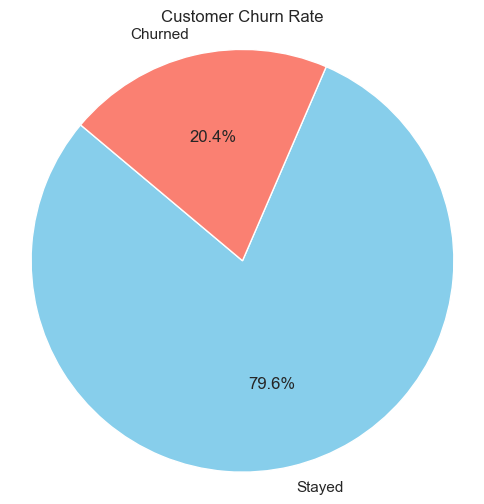

In [10]:
# Set plot style
sns.set(style="whitegrid")

# 1. Churn rate pie chart
churn_counts = df_cleaned['Exited'].value_counts()
labels = ['Stayed', 'Churned']
colors = ['skyblue', 'salmon']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Customer Churn Rate')
plt.axis('equal')
plt.show()

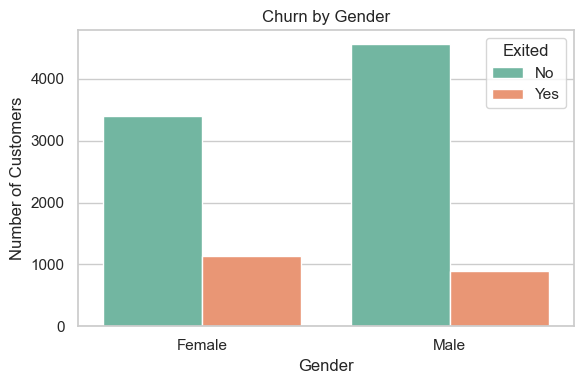

In [11]:
# 2. Churn by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Gender', hue='Exited', palette='Set2')
plt.title('Churn by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

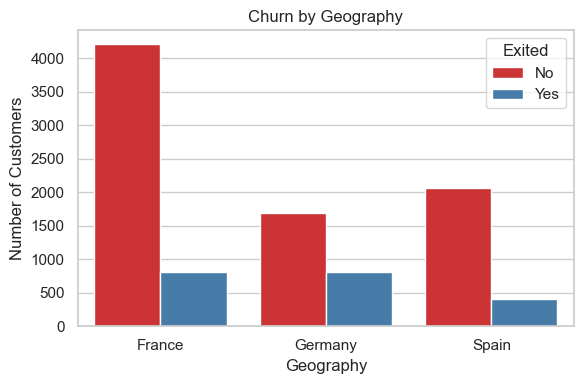

In [12]:
# 3. Churn by Geography
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='Geography', hue='Exited', palette='Set1')
plt.title('Churn by Geography')
plt.xticks([0, 1, 2], ['France', 'Germany', 'Spain'])
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

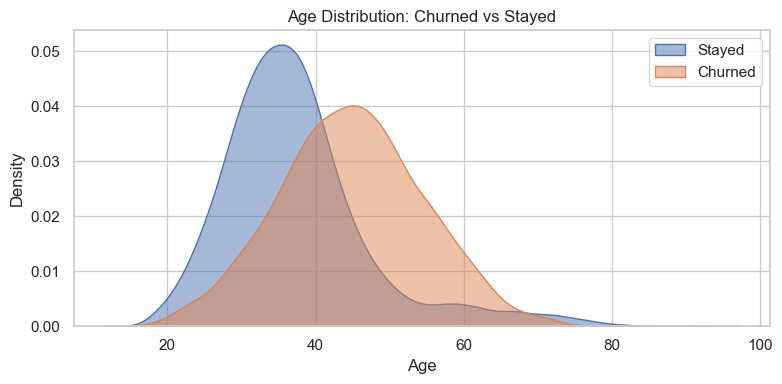

In [13]:
# 4. Churn vs Age Distribution
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df_cleaned[df_cleaned['Exited'] == 0], x='Age', label='Stayed', fill=True, alpha=0.5)
sns.kdeplot(data=df_cleaned[df_cleaned['Exited'] == 1], x='Age', label='Churned', fill=True, alpha=0.5)
plt.title('Age Distribution: Churned vs Stayed')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

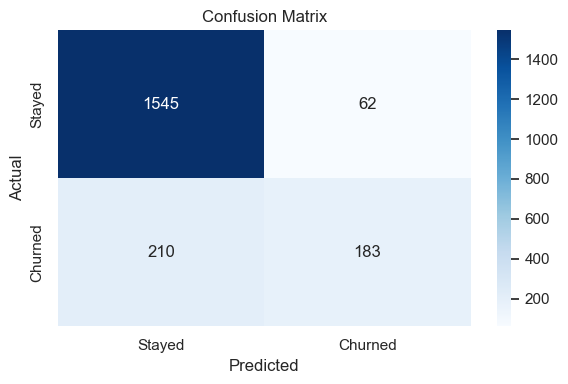

(0.864,
 {'0': {'precision': 0.8803418803418803,
   'recall': 0.9614187927815806,
   'f1-score': 0.9190957763236169,
   'support': 1607.0},
  '1': {'precision': 0.746938775510204,
   'recall': 0.46564885496183206,
   'f1-score': 0.5736677115987461,
   'support': 393.0},
  'accuracy': 0.864,
  'macro avg': {'precision': 0.8136403279260422,
   'recall': 0.7135338238717064,
   'f1-score': 0.7463817439611815,
   'support': 2000.0},
  'weighted avg': {'precision': 0.8541281702424559,
   'recall': 0.864,
   'f1-score': 0.8512191616051799,
   'support': 2000.0}})

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split features and target
X = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

accuracy, class_report


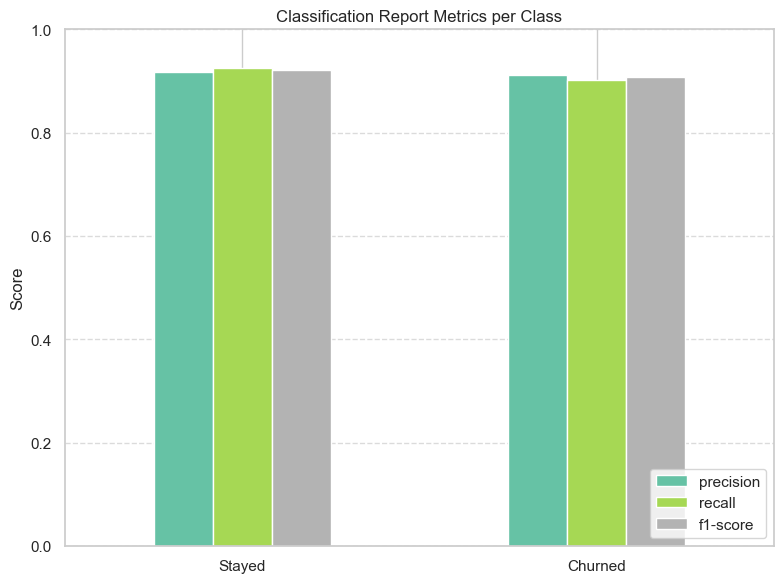

In [15]:
from sklearn.metrics import classification_report

# Assume y_test and y_pred are already defined from previous context
# For demonstration purposes, let's simulate them here
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic binary classification data
X, y = make_classification(n_samples=2000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Generate classification report as dict
report_dict = classification_report(y_test, y_pred, output_dict=True, target_names=['Stayed', 'Churned'])
report_df = pd.DataFrame(report_dict).transpose()

# Filter out only the class rows (exclude avg/accuracy)
class_metrics = report_df.loc[['Stayed', 'Churned'], ['precision', 'recall', 'f1-score']]

# Plot as bar chart
class_metrics.plot(kind='bar', figsize=(8, 6), colormap='Set2')
plt.title('Classification Report Metrics per Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()